# ChatGPT o3 mini high

# Prompt

Create a Pong game in Python that runs inside a Jupyter Notebook.
The game should be single-player:
– The player controls a paddle using the up and down arrow keys
– The opponent (computer) should move logically, e.g. by tracking the ball with some delay
– Include a score display for both the player and the opponent
– Use pygame or tkinter for drawing and animation, ensuring compatibility with Jupyter Notebooks
– The game should run entirely within a single notebook cell
– Use pygame.display.set_mode((width, height)) and set a window caption using pygame.display.set_caption()
– If needed, adapt the setup for Jupyter compatibility (e.g. use %matplotlib, pygame.display.init(), or similar)
– Make sure the game runs in a loop and can be exited with the ESC key or after a certain score is reached

## Code-Analyse

In [ ]:
! pip install pygame

In [8]:
import pygame
import sys

# Initialize pygame
pygame.init()

# Window settings
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Single Player Pong")

# Colors and fonts
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
font = pygame.font.Font(None, 36)

# Game objects dimensions
paddle_width, paddle_height = 10, 100
ball_radius = 10

# Player paddle position
player_x = 20
player_y = height // 2 - paddle_height // 2

# Opponent paddle position
opponent_x = width - 20 - paddle_width
opponent_y = height // 2 - paddle_height // 2

# Ball position and velocity
ball_x = width // 2
ball_y = height // 2
ball_dx = 5
ball_dy = 5

# Scores and winning condition
player_score = 0
opponent_score = 0
max_score = 10

clock = pygame.time.Clock()
running = True

while running:
    clock.tick(60)  # Limit to 60 FPS
    
    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                running = False
    
    # Player paddle movement (arrow keys)
    keys = pygame.key.get_pressed()
    if keys[pygame.K_UP]:
        player_y -= 7
    if keys[pygame.K_DOWN]:
        player_y += 7
    # Keep player paddle within window
    player_y = max(0, min(height - paddle_height, player_y))
    
    # Opponent paddle logic: simple AI tracking the ball with a fixed speed
    if opponent_y + paddle_height/2 < ball_y:
        opponent_y += 5
    elif opponent_y + paddle_height/2 > ball_y:
        opponent_y -= 5
    opponent_y = max(0, min(height - paddle_height, opponent_y))
    
    # Move the ball
    ball_x += ball_dx
    ball_y += ball_dy
    
    # Ball collision with top and bottom boundaries
    if ball_y - ball_radius <= 0 or ball_y + ball_radius >= height:
        ball_dy = -ball_dy
    
    # Ball collision with player paddle
    if (ball_x - ball_radius <= player_x + paddle_width and
        player_y < ball_y < player_y + paddle_height):
        ball_dx = -ball_dx
    
    # Ball collision with opponent paddle
    if (ball_x + ball_radius >= opponent_x and
        opponent_y < ball_y < opponent_y + paddle_height):
        ball_dx = -ball_dx
    
    # Scoring: ball goes off left or right side
    if ball_x < 0:
        opponent_score += 1
        ball_x, ball_y = width // 2, height // 2
        ball_dx, ball_dy = 5, 5
    elif ball_x > width:
        player_score += 1
        ball_x, ball_y = width // 2, height // 2
        ball_dx, ball_dy = -5, 5
    
    # Clear screen and redraw objects
    screen.fill(BLACK)
    pygame.draw.rect(screen, WHITE, (player_x, player_y, paddle_width, paddle_height))
    pygame.draw.rect(screen, WHITE, (opponent_x, opponent_y, paddle_width, paddle_height))
    pygame.draw.circle(screen, WHITE, (ball_x, ball_y), ball_radius)
    
    # Draw score
    score_text = font.render(f"{player_score} : {opponent_score}", True, WHITE)
    screen.blit(score_text, (width//2 - score_text.get_width()//2, 20))
    
    pygame.display.flip()
    
    # End game when max score is reached
    if player_score >= max_score or opponent_score >= max_score:
        running = False

# Display final score and game over message
screen.fill(BLACK)
final_text = font.render("Game Over", True, WHITE)
score_text = font.render(f"Final Score: {player_score} : {opponent_score}", True, WHITE)
screen.blit(final_text, (width//2 - final_text.get_width()//2, height//2 - final_text.get_height()))
screen.blit(score_text, (width//2 - score_text.get_width()//2, height//2 + score_text.get_height()))
pygame.display.flip()
pygame.time.wait(3000)

pygame.quit()
sys.exit()


SystemExit: 

Der Code implementiert ein Single-Player-Pong-Spiel mit pygame. Hier die wichtigsten Punkte:

- **Initialisierung:**  
  `pygame.init()` startet alle pygame-Module. Das Fenster wird mit fester Breite (800) und Höhe (600) erstellt, und der Fenstertitel wird gesetzt.

- **Definition von Spielobjekten:**  
  Es werden Konstanten für Farben, Schlägerabmessungen (Breite, Höhe) und den Ballradius definiert. Die Positionen des Spieler- und Gegnerpaddles sowie die Startposition und Geschwindigkeiten (dx, dy) des Balls werden festgelegt.

- **Spielschleife:**  
  In einer while-Schleife, die 60 FPS anstrebt, werden folgende Aktionen ausgeführt:  
  - **Ereignisbehandlung:**  
    Ereignisse wie Fenster schließen oder Drücken der ESC-Taste führen zum Beenden des Spiels.
  - **Spielereingaben:**  
    Mit `pygame.key.get_pressed()` werden die Pfeiltasten abgefragt, um das Spielerpaddle vertikal zu bewegen. Dabei wird sichergestellt, dass das Paddle im Fenster bleibt.
  - **Gegner-KI:**  
    Das Gegnerpaddle bewegt sich in Richtung des Balles, basierend auf der aktuellen Ballposition, jedoch mit fester Geschwindigkeit, um eine gewisse Verzögerung zu simulieren.
  - **Ballbewegung und Kollision:**  
    Der Ball wird entsprechend seiner Geschwindigkeiten verschoben. Bei Kollision mit oberen und unteren Fenstergrenzen kehrt sich die vertikale Richtung um. Bei Berührung der Paddles ändert sich die horizontale Bewegungsrichtung.
  - **Punktestand:**  
    Wenn der Ball die linke oder rechte Seite verlässt, wird ein Punkt an den Gegner bzw. den Spieler vergeben, und der Ball wird in die Mitte zurückgesetzt.
  - **Anzeige:**  
    Der Hintergrund wird neu gezeichnet, Paddles und Ball werden gezeichnet und der aktuelle Punktestand wird oben angezeigt.
  - **Spielende:**  
    Die Schleife wird beendet, wenn ein Spieler den festgelegten Maximalpunktestand erreicht hat.

- **Spielabschluss:**  
  Nach Beendigung der Hauptschleife zeigt das Fenster einen "Game Over"-Bildschirm mit Endstand für einige Sekunden, bevor pygame beendet wird.

Diese Struktur sorgt dafür, dass das Spiel kontinuierlich aktualisiert wird, Eingaben verarbeitet und grafisch dargestellt wird.

## Output

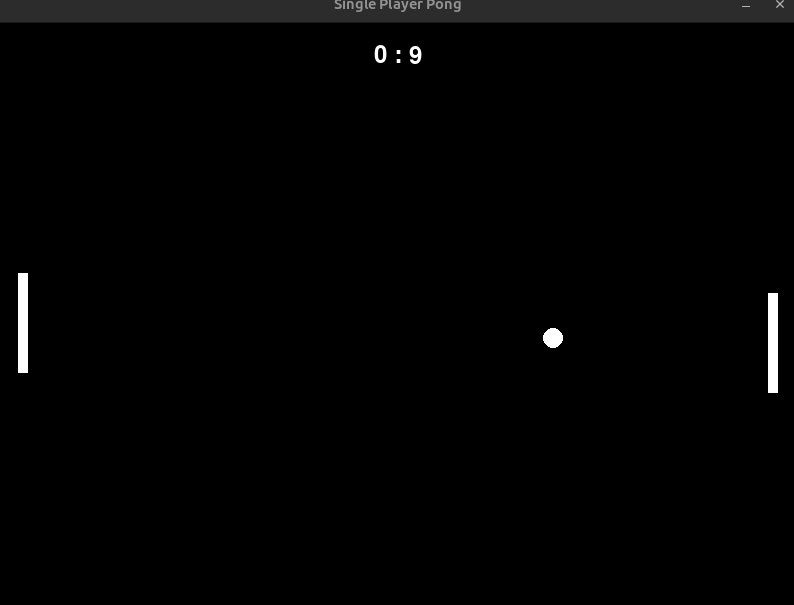

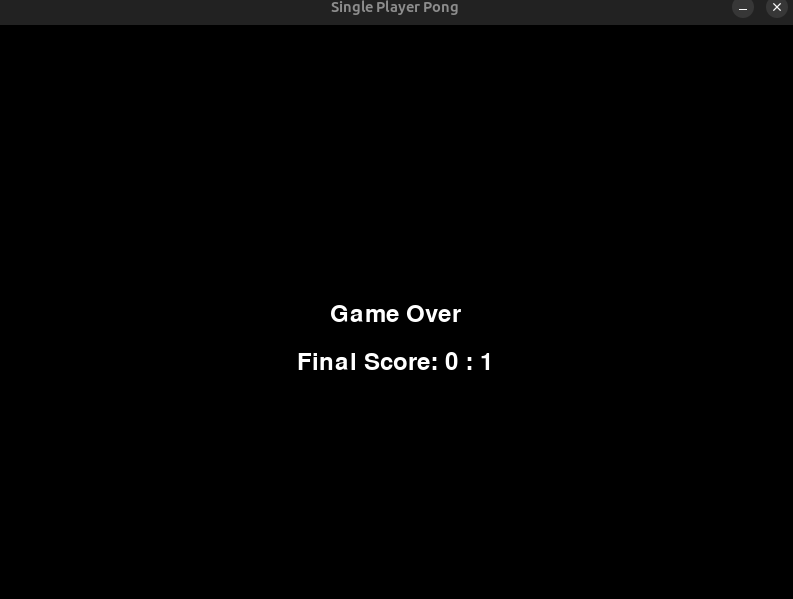

In [9]:
from IPython.display import Image, display

display(Image(filename='./pictures/pong_game.png'))
display(Image(filename='./pictures/pong_game_result.png'))

Das generierte Spiel funktioniert fehlerfrei und kann als Single-Player genutzt werden.
Die Pfeiltasten nach oben und unten werden zum Bewegen verwendet.
Das Ergebnis wird ebenfalls richtig angezeigt und bei einem Punktgewinn erhöht.
Die Schwierigkeit des COM ist jedoch extrem hoch und es ist unmöglich, ein Tor zu erzielen.
Das Endergebnis wird nachdem man das Spiel mit mit "x" beendet hat kurz angezeigt. 